#CS312 DATA ANALYTICS AND VISUALIZATION  
#SUNIL BHENSPALIYA
#201951157 (CSE)
#LAB ASSIGNMENT :- 11

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/sample_data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

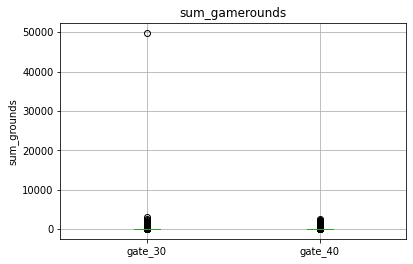

In [ ]:
ax = data.boxplot(by='version', column='sum_gamerounds')
ax.set_xlabel('')
ax.set_ylabel('sum_grounds')
plt.suptitle('')

In [ ]:
mean_gate30=data[data['version']=='gate_30'].sum_gamerounds.mean()
mean_gate40=data[data['version']=='gate_40'].sum_gamerounds.mean()

print(mean_gate30)
print(mean_gate40)

52.45626398210291
51.29877552814966


In [ ]:
diff=mean_gate30-mean_gate40
diff

1.157488453953249

In [ ]:
ngate_30=(data[data['version']=='gate_30']).shape[0]
ngate_40=(data[data['version']=='gate_40']).shape[0]

In [ ]:
print(ngate_30)
print(ngate_40)

44700
45489


In [ ]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

perm_diffs = [perm_fun(data.sum_gamerounds, ngate_30, ngate_40) for _ in range(1000)]

Text(0, 0.5, 'Frequency')

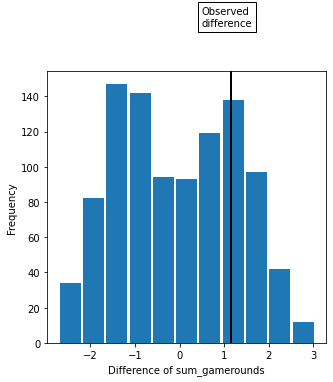

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)

ax.axvline(x = mean_gate30 - mean_gate40, color='black', lw=2)

ax.text(0.5, 180, 'Observed\ndifference',bbox={'facecolor':'white'})

ax.set_xlabel('Difference of sum_gamerounds')
ax.set_ylabel('Frequency')

In [ ]:
a=[]
for i in range(len(perm_diffs)):
    if(perm_diffs[i] >mean_gate30 - mean_gate40):
      a.append(perm_diffs[i])


np.mean(a)

1.6986857268693256